In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from psis import psisloo
from os import path as op

In [7]:
with open(op.join("..", "affluence_hierarchical_logit_bin.pkl"), "rb") as f:
    (logit_regional_ix,
     [logit_mu_national_ps, logit_mu_regional_ps, logit_sigma_national_ps, logit_sigma_regional_ps,
      logit_eta, logit_log_lik]) = pickle.load(f)
    
with open(op.join("..", "wellbeing_hierarchical_binomial.pkl"), "rb") as f:
    bin_p_regional, bin_log_lik, bin_national_sigma, bin_national_mu = pickle.load(f)

with open(op.join("..", "wellbeing_hierarchical_gaussian.pkl"), "rb") as f:
    gau_mu_national, gau_mu_regional, gau_sigma_national, gau_sigma_regional, gau_log_lik = pickle.load(f)


In [15]:
bin_log_lik_m = bin_log_lik.copy()
# Need to add constant, so Kontula is slightly above 0.0
bin_log_lik_m[:, 76] = bin_log_lik_m[:, 76] + 150

logit_loo, logit_loos, logit_khat = psisloo(logit_log_lik)
bin_loo, bin_loos, bin_khat = psisloo(bin_log_lik_m)
gau_loo, gau_loos, gau_khat = psisloo(gau_log_lik)

logit_lpd = np.log(np.exp(logit_log_lik).mean(axis=0)).sum()
bin_lpd = np.log(np.exp(bin_log_lik_m).mean(axis=0)).sum()
gau_lpd = np.log(np.exp(gau_log_lik).mean(axis=0)).sum()

print("PSIS LOO binomial logit: " + str(logit_loo))
print("PSIS LOO binomial gaussian: " + str(bin_loo))
print("PSIS LOO gaussian: " + str(gau_loo))
print()
print("N_eff binomial logit: " + str(logit_lpd - logit_loo))
print("N_eff binomial gaussian: " + str(bin_lpd - bin_loo))
print("N_eff gaussian: " + str(gau_lpd - gau_loo))



PSIS LOO binomial logit: -10570.13415716165
PSIS LOO binomial gaussian: -39798.04720064491
PSIS LOO gaussian: 4024.4107654482796

N_eff binomial logit: 1715.4692167466783
N_eff binomial gaussian: 2059.153619775665
N_eff gaussian: 82.98156558440678


Text(0.5, 1.0, 'Histogram of khat values for the Gaussian model')

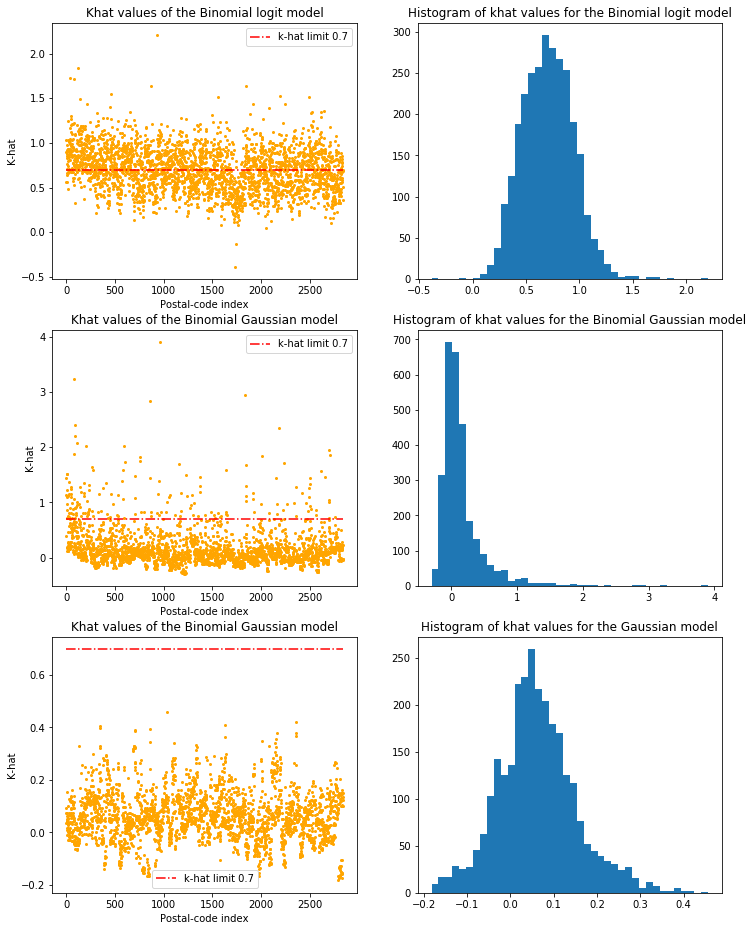

In [23]:
def add_khat_label(ax, xlim):
    ax.plot((0, xlim), (0.7, 0.7), linestyle="-.", c="red", label="k-hat limit 0.7")
    ax.set_ylabel("K-hat")
    ax.set_xlabel("Postal-code index")
    ax.legend()

fig, ax = plt.subplots(3,2, figsize=(12, 16))

# BIN LOGIT
ax[0,0].scatter(range(0,len(logit_khat)), logit_khat, color="Orange", s=4)
ax[0,0].set_title("Khat values of the Binomial logit model")
add_khat_label(ax[0,0], len(logit_khat))

ax[0,1].hist(logit_khat, bins=40)
ax[0,1].set_title("Histogram of khat values for the Binomial logit model")

ax[1,0].scatter(range(0,len(bin_khat)), bin_khat, color="Orange", s=4)
ax[1,0].set_title("Khat values of the Binomial Gaussian model")
add_khat_label(ax[1,0], len(bin_khat))

ax[1,1].hist(bin_khat, bins=40)
ax[1,1].set_title("Histogram of khat values for the Binomial Gaussian model")

ax[2,0].scatter(range(0,len(gau_khat)), gau_khat, color="Orange", s=4)
ax[2,0].set_title("Khat values of the Binomial Gaussian model")
add_khat_label(ax[2,0], len(gau_khat))

ax[2,1].hist(gau_khat, bins=40)
ax[2,1].set_title("Histogram of khat values for the Gaussian model")
